### Reference
- emceeでマルコフ連鎖モンテカルロ法（MCMC）によるサンプリング
 - https://qiita.com/phyblas/items/38bcff139e67a41d9e16

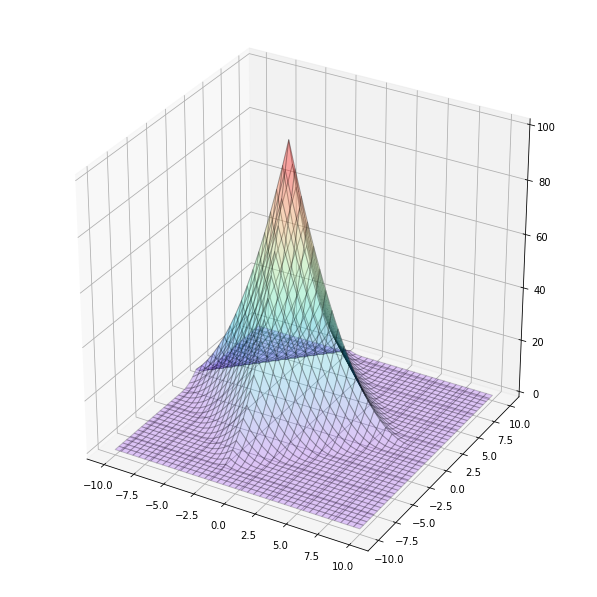

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def fn(xy):
    x,y = xy
    return np.maximum(0,(10-np.abs(2+x)-np.abs(y-1)))**2

mx,my = np.meshgrid(np.linspace(-10,10,41),np.linspace(-10,10,41))
mz = fn([mx,my])
ax = plt.figure(figsize=[8,8]).add_axes([0,0,1,1],projection='3d')
ax.plot_surface(mx,my,mz,rstride=1,cstride=1,alpha=0.2,edgecolor='k',cmap='rainbow')
plt.show()

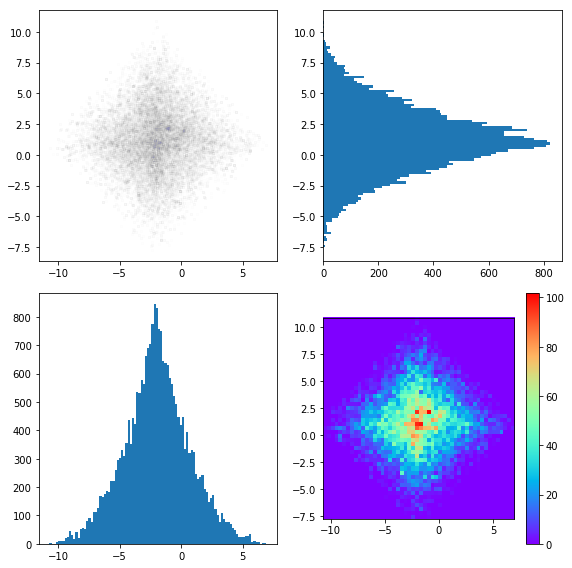

In [3]:
import emcee

def lnfn(xy):
    x,y = xy
    prop = np.maximum(1e-10,(10-np.abs(2+x)-np.abs(y-1)))**2
    return np.log(prop)

ndim = 2 # 鎖の数
nwalker = 6 # 次元の数
nstep = 4000 # 鎖の長さ
xy0 = np.random.uniform(-4,4,[nwalker,ndim]) # 初期のxとy
sampler = emcee.EnsembleSampler(nwalker,ndim,lnfn) # サンプラーを作る
sampler.run_mcmc(xy0,nstep) # サンプリング開始

xy = sampler.flatchain # サンプリングでできた結果を取得
x,y = xy[:,0],xy[:,1]

# 分布を描く関数
def bunpuplot(x,y):
    plt.figure(figsize=[8,8])
    plt.subplot(221,aspect=1)
    plt.scatter(x,y,alpha=0.002,marker='.')
    plt.subplot(222)
    plt.hist(y,bins=100,orientation='horizontal')
    plt.subplot(223)
    plt.hist(x,bins=100)
    plt.subplot(224,aspect=1)
    plt.hist2d(x,y,bins=50,cmap='rainbow')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

bunpuplot(x,y)

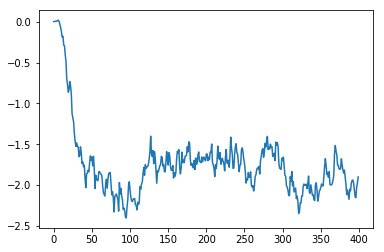

In [4]:
ndim = 2
nwalker = 100
nstep = 400
xy0 = np.random.uniform(-0.1,0.1,[nwalker,ndim])
sampler = emcee.EnsembleSampler(nwalker,ndim,lnfn)
sampler.run_mcmc(xy0,nstep)
xy = sampler.flatchain
x,y = xy[:,0],xy[:,1]

plt.figure()
plt.plot(sampler.chain[:,:,0].mean(0).T)
plt.show()

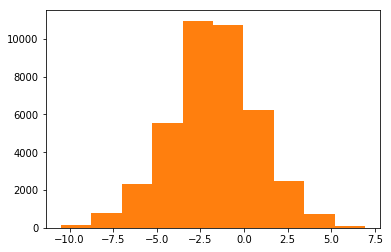

In [11]:
plt.hist(x)
plt.show()